# **Proyecto Consulta Temperaturas Interactiva por Ciudad y Mes**
## Objetivo
Crear un programa interactivo para la visualización de datos meteorológicos. Este programa permitirá a los usuarios visualizar los registros climáticos según el lugar y el mes. El objetivo es aplicar los conceptos de creación de gráficos, personalización de estilos y combinación con las habilidades de desarrollo de programas con Python.
## Consigna
Cargar un DataFrame con los datos meteorológicos provistos en el archivo descargable de esta lección.

Asegurarse de que las fechas estén en formato correcto para su manipulación posterior.

Crear una función (usando input) que permita al usuario seleccionar un mes de una lista de opciones.

Crear otra función que permita al usuario seleccionar una ciudad de la lista de ciudades disponibles en los datos.

Mostrar un gráfico de líneas que muestre las temperaturas mínimas y máximas que se registraron en la ciudad elegida durante el mes elegido.

Permitir que el programa le pregunte al usuario si desea seguir haciendo consultas o no.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


**Cargar un DataFrame con los datos meteorológicos provistos en el archivo**

In [12]:
df = pd.read_csv("Nombre del Archivo.csv")
df

,Fecha,Ciudad,Temperatura Maxima,Temperatura Minima,Precipitacion,Velocidad del Viento,Humedad Relativa
0,1/1/2023,Buenos Aires,27,18,0.0,22.7,68.8
1,1/1/2023,Cordoba,35,18,0.0,33.8,61.7
2,1/1/2023,Rosario,23,21,0.0,10.6,80.0
3,1/1/2023,Mendoza,35,21,0.0,23.8,76.8
4,1/1/2023,Tucuman,36,18,17.2,25.7,54.9
...,...,...,...,...,...,...,...
1820,31/12/2023,Buenos Aires,15,12,0.0,17.9,49.2
1821,31/12/2023,Cordoba,15,7,0.0,17.8,62.4
1822,31/12/2023,Rosario,14,8,0.0,38.2,31.2
1823,31/12/2023,Mendoza,13,9,84.8,27.6,35.3


In [13]:
#Revisamos con que tipo de datos estamos trabajando
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fecha                 1825 non-null   object 
 1   Ciudad                1825 non-null   object 
 2   Temperatura Maxima    1825 non-null   int64  
 3   Temperatura Minima    1825 non-null   int64  
 4   Precipitacion         1825 non-null   float64
 5   Velocidad del Viento  1825 non-null   float64
 6   Humedad Relativa      1825 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 99.9+ KB


In [14]:
#Revisamos si hay valores null.
df.isnull().sum()


Fecha                   0
Ciudad                  0
Temperatura Maxima      0
Temperatura Minima      0
Precipitacion           0
Velocidad del Viento    0
Humedad Relativa        0
dtype: int64

**Asegurarse de que las fechas estén en formato correcto para su manipulación posterior.**

In [15]:
#Revisamos el formato de fecha
type(df['Fecha'][0])

str

In [16]:
df['Fecha'] = pd.to_datetime(df['Fecha'], format = '%d/%m/%Y')
type(df['Fecha'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [17]:
# Revisamos nuevamente
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Fecha                 1825 non-null   datetime64[ns]
 1   Ciudad                1825 non-null   object        
 2   Temperatura Maxima    1825 non-null   int64         
 3   Temperatura Minima    1825 non-null   int64         
 4   Precipitacion         1825 non-null   float64       
 5   Velocidad del Viento  1825 non-null   float64       
 6   Humedad Relativa      1825 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 99.9+ KB


**Crear una función (usando input) que permita al usuario seleccionar un mes de una lista de opciones.**

In [18]:
# Lista de ciudades
ciudades = []
#Ciclo for que recorre el DataFrame por la columna Ciudad
for ciudad in df['Ciudad']:
    #Condicion que va agregando elementos a ciudades sin que se repitan
    if ciudad not in ciudades: 
        ciudades.append(ciudad)
#Vamos a hacer un diccionario de meses sin valores repetidos
dict_meses = {
    1:'Enero',
    2:'Febrero',
    3:'Marzo',
    4:'Abril',
    5:'Mayo',
    6:'Junio',
    7:'Julio',
    8:'Agosto',
    9:'Septiembre',
    10:'Octubre',
    11:'Noviembre',
    12:'Diciembre',
}

Bienvenido al consultor de Clima

Ingresa una de las ciudades que te interesa saber el clima

Las ciudades disponibles son: ['Buenos Aires', 'Cordoba', 'Rosario', 'Mendoza', 'Tucuman']


Ingresa la ciudad que te llama la atencion 
>  Rosario\
Ingrese el número del mes que quiere ver: 
>  2


Ciudad o Mes no validos. Intenta otra vez!

Ingresa una de las ciudades que te interesa saber el clima

Las ciudades disponibles son: ['Buenos Aires', 'Cordoba', 'Rosario', 'Mendoza', 'Tucuman']


Ingresa la ciudad que te llama la atencion 
>  Rosario
Ingrese el número del mes que quiere ver: 
>  4


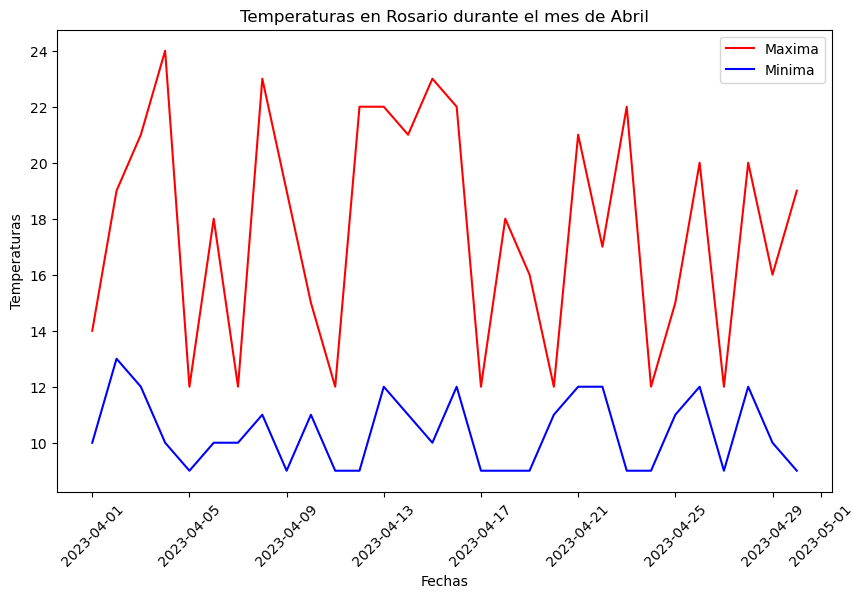

Deseas continuar consultando: S/N 
 N


In [20]:

# Entrada: No recibe nada
# Proceso : En base a la ciudad y el mes que decida el usuario se va a mostrar un grafico con la informacion deseada, aplicando los filtros
#           correspondientes en el DataFrame para quedarnos unicamente con la informacion que importa
# Salida: Un grafico con las temperaturas correpsondientes a la ciudad y el mes que escogio el usuarios. Se le pregunta si quiere realizar otra consulta.
def consultor_temperaturas():
    while True:
        print("\nIngresa una de las ciudades que te interesa saber el clima\n")
        #Solicitamos la ciudad
        print(f"Las ciudades disponibles son: {ciudades}")
        opcion_ciudad = input(f"Ingresa la ciudad que te llama la atencion \n> ").title()
        #Solicitamos mes
        opcion_mes = int(input(f"Ingrese el número del mes que quiere ver: \n> "))
        #Validamos
        if opcion_ciudad not in ciudades or opcion_mes not in range(1,13):
            print("Ciudad o Mes no validos. Intenta otra vez!")
            continue
        #Creamos el DataFrame con la ciudad y el mes elegidos
        condicion1 = df['Ciudad'] == opcion_ciudad
        condicion2 = df['Fecha'].dt.month == opcion_mes
        datos_ciudad_mes = df[(condicion1) & (condicion2)]

        #Creamos el grafico con las temperaturas
        plt.figure(figsize=(10,6))
        plt.plot(datos_ciudad_mes['Fecha'],datos_ciudad_mes['Temperatura Maxima'], label= 'Maxima', color = 'red')
        plt.plot(datos_ciudad_mes['Fecha'],datos_ciudad_mes['Temperatura Minima'], label= 'Minima', color = 'blue')
        plt.title(f'Temperaturas en {opcion_ciudad} durante el mes de {dict_meses[opcion_mes]}')
        plt.xlabel('Fechas')
        plt.ylabel('Temperaturas')
        plt.legend()
        plt.xticks(rotation=45)
        plt.show()

        #Preguntamos 
        respuesta_usuario = input('Deseas continuar consultando: S/N \n')
        if respuesta_usuario.upper() != 'S':
            break
print("Bienvenido al consultor de Clima")
consultor_temperaturas()

**Comparar el clima entre dos ciudades**

Bienvenido al comparador de Clima

Ingresa una de las ciudades que te interesa comparar
Las ciudades disponibles son: ['Buenos Aires', 'Cordoba', 'Rosario', 'Mendoza', 'Tucuman']


 Ingresa la primera ciudad que te llama la atencion 
>  Buenos Aires
 Ingresa la segunda ciudad que te llama la atencion 
>  Tucuman
 Ingrese el número del mes que quiere ver: 
>  4


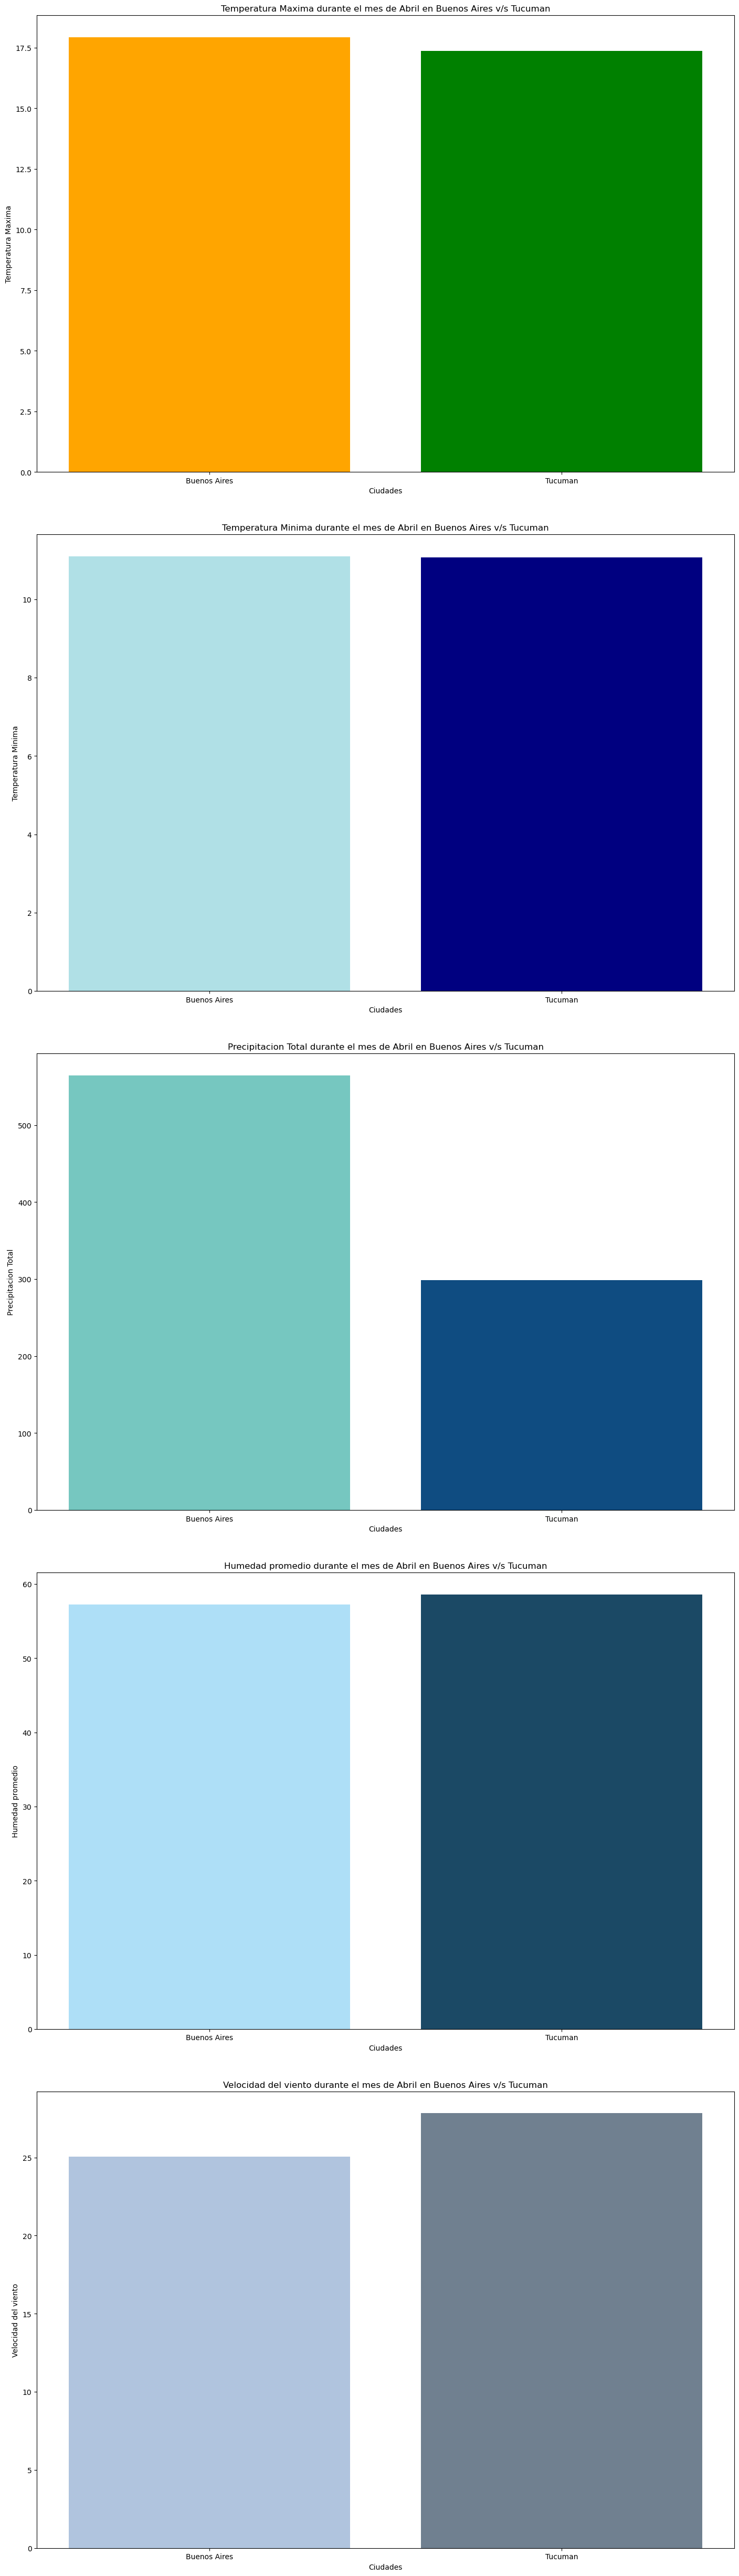

In [ ]:
#Obtener datos va a ser un diccionario que va a contener los datos de las ciudades en un diccionario al cual vamos a acceder con
# las claves en crear_graficos
#Entrada: El Dataframe filtrado segun la ciudad y mes escogidos por el usuario.
#Proceso: Realiza operaciones matematicas para calcular promedio y valor total.
#Salida: Un diccionario con los valores correspondientes al dataframe enviado
def obtener_datos(dataframe):
     return {
        #Calculamos el Promedio de la Temperatura maxima 
        "temp_max": dataframe['Temperatura Maxima'].mean(),
        # Calculmaos el Promedio de la Temperatura Minima 
        "temp_min": dataframe['Temperatura Minima'].mean(),
        #Calcula precipitacion total
        "precipitacion": dataframe['Precipitacion'].sum(),
        # Humedad relativa promedio    
        "humedad": dataframe['Humedad Relativa'].mean(),
        # Velocidad del viento promedio
        "viento": dataframe['Velocidad del Viento'].mean()
    }

#Funcion para crear los graficos
#Entrada: Una lista de ciudades, la informacion de estas ciudades y el mes.
#Proceso: Recorre un ciclo for el cual ayuda a leer y coomparar la informacion dentro del diccionario.
#Salida: Comparacion de los 5 graficos de barra.
def crear_graficos(listaDeCiudades, informacion, mes):
     fig, axs = plt.subplots(ncols=1,nrows=5, figsize=(15, 50))
     fig.subplots_adjust(hspace=0.5)
     titulos =  ['Temperatura Maxima','Temperatura Minima','Precipitacion Total','Humedad promedio','Velocidad del viento']
     claves = ["temp_max", "temp_min", "precipitacion", "humedad", "viento"]
     colores = [['orange', 'green'],['#B0E0E6', '#000080'], ['#76C7C0', '#0F4C81'],['#AEDFF7', '#1B4965'],['#B0C4DE', '#708090']]
     #Comparacion entre ciudades sera un for que nos va a ahorra tiempo en la ejecucion del codigo
     for i, clave in enumerate(claves):
        #Accedemos al primer diccionario y buscamos el valor segun la clave en la que se encuentre el for
        valores = [informacion[0][clave], informacion[1][clave]]
        axs[i].bar(listaDeCiudades, valores, color=colores[i])
        axs[i].set_title(f"{titulos[i]} durante el mes de {dict_meses[mes]} en {listaDeCiudades[0]} v/s {listaDeCiudades[1]}")
        axs[i].set_ylabel(titulos[i])
        axs[i].set_xlabel('Ciudades')
     # Una separacion leve para que no esten tan juntos
     plt.tight_layout(pad=4.0)
     # Mostramos
     plt.show()
#Entrada: No recibe nada
#Proceso: En base a la primera ciudad, la segunda y el mes que decida el usuario se realizara el filtrado del DataFrame que sera usado por 
#         datos_ciudad que sera un diccionario que contendra la informacion que retorne obtener_datos de la ciudad1 y ciudad2
#         finalmente le pasamos lista_ciudades, datos_ciudad, el mes a  crear_graficos y se le pregunta si desea realizar otra comparacion.
#Salida: Graficos de barra comparativos entre las ciudades electas en un mes especifico.
def comparar_clima():
     while True:
         print("\nIngresa una de las ciudades que te interesa comparar")
         #Mostramos ciudades
         print(f"Las ciudades disponibles son: {ciudades}")
         ciudad = input(f" Ingresa la primera ciudad que te llama la atencion \n> ").title()
         ciudad2 = input(f" Ingresa la segunda ciudad que te llama la atencion \n> ").title()
         opcion_mes = int(input(f" Ingrese el número del mes que quiere ver: \n> "))
         #Revisamos que sean ciudades/comparaciones/meses validos
         if ciudad not in ciudades or ciudad2 not in ciudades or ciudad2 == ciudad or opcion_mes not in range(1,13):
             print("Ciudad o Mes no validos. Revisa que no estes intentando comparar la misma ciudad. Intenta otra vez!")
             continue
         lista_ciudades = [ciudad , ciudad2]
         df_ciudad = df['Ciudad'] == ciudad
         df_ciudad2 = df['Ciudad'] == ciudad2
         condicion_mes = df['Fecha'].dt.month == opcion_mes
         # Creamos los DF correspondientes
         df_primera_ciudad = df[df_ciudad & condicion_mes]
         df_segunda_ciudad = df[df_ciudad2 & condicion_mes]

         #Llamamos a obtener_datos para rescatar los valores solicitados
         datos_ciudad = [
             obtener_datos(df_primera_ciudad),
             obtener_datos(df_segunda_ciudad)
         ]
         # Comenzamos a crear los graficos
         crear_graficos(lista_ciudades, datos_ciudad, opcion_mes)
         # Preguntamos al usuario
         respuesta_usuario = input('Deseas continuar consultando: S/N \n> ')
         if respuesta_usuario.upper() != 'S':
             break
         
print('Bienvenido al comparador de Clima')
comparar_clima()